In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [2]:
# import dataset and split into the Training and Test set
df = pd.read_csv('mnist_binary.csv')
print('The shape of raw data: ', df.shape)
print(df[:2])
#df = df[:1000]
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('The shape of Training data: ',X_train.shape, y_train.shape)
print('The shape of Test data: ',X_test.shape, y_test.shape)
print('X_train', X_train[:2])

The shape of raw data:  (10000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 785 columns]
The shape of Training data:  (8000, 784) (8000,)
The shape of Test data:  (2000, 784) (2000,)
X_train [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[14:28:16] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 0.9485


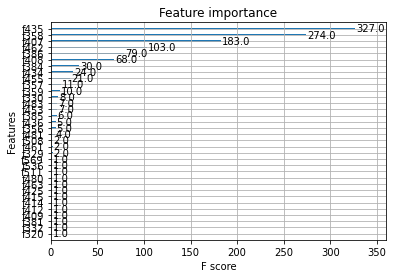

In [3]:
# 设置模型参数
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 2,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.001,
    'seed': 1000,
    'nthread': 4,
}

plst = list(params.items())

dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 200
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy:", accuracy)
# 绘制特征重要性
plot_importance(model)
plt.show();

In [4]:
# Other Evaluation Metrics
mse = np.sum(np.power(y_pred - y_test,2))/(len(X_test))
rmse = np.sqrt(mse)
R2_test = 1 - np.sum(np.power(y_pred - y_test,2))/np.sum(np.power(np.mean(y_test) - y_test,2))
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2_test = ', R2_test)
print('accuracy = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('F1 = ', f1_score(y_test, y_pred))

MSE =  0.0515
RMSE =  0.22693611435820435
R2_test =  0.43774837329141014
accuracy =  0.9485
precision =  0.9573203673689897
recall =  0.9866369710467706
F1 =  0.9717576089936935


fpr:[0.        0.3872549 1.       ]
tpr:[0.         0.98663697 1.        ]
thresholds:[2. 1. 0.]
AUC面积值： 0.7996910345429933
AUC面积得分： 0.7996910345429933


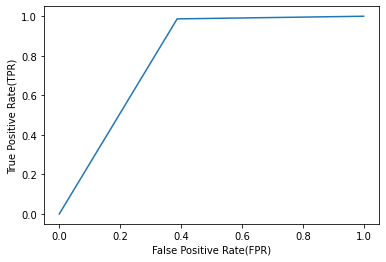

In [5]:
# ROC AUC
#返回ROC曲线相关值。返回FPR,TPR与阈值，当分值达到阈值时，将样本判定为正类，否则判定为负类。
#y_true：二分类的标签值（真实值）
#y_score：每个标签（数据）的分值或概率值。当该值达到阈值时，判定为正例，否则判定为负例。
#在实际模型评估时，该值往往通过决策函数（decision_function）或概率函数（predict_proba）获得
#pos_label：指定正例的标签值
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print(f'fpr:{fpr}')
print(f'tpr:{tpr}')
print(f'thresholds:{thresholds}')
#auc与roc_auc_score函数都可以返回auc面积值，但是注意，两个函数的参数是不同的
print('AUC面积值：', auc(fpr, tpr))
print('AUC面积得分：', roc_auc_score(y_true=y_test, y_score=y_pred))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.show()

/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from c

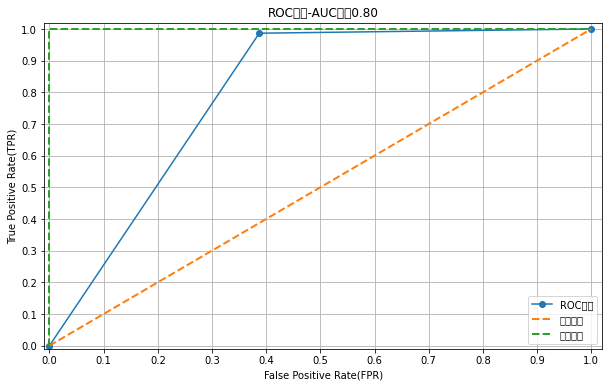

In [6]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, ls='-', marker='o', label='ROC曲线')
plt.plot([0,1], [0,1], lw=2, ls='--', label='随机猜想')
plt.plot([0,0,1], [0,1,1], lw=2, ls='--', label='完美预测')
plt.xlim(-0.01, 1.02)
plt.ylim(-0.01, 1.02)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title(f'ROC曲线-AUC值为{auc(fpr, tpr):.2f}')
plt.grid()
plt.legend()